<a href="https://colab.research.google.com/github/saurabhkr78/100-days-ML/blob/main/Gaussian_mixture_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Statement:
Categorize customers into distinct segments based on their purchasing behaviour.this segmentation will help in tailoring marketing strategies and promotions to diff customers groups,ultimately maximizing sales and customer satisfaction
#Gausian Mixture model
A Gaussian Mixture Model (GMM) is a probabilistic model that assumes all the data points are generated from a mixture of several Gaussian distributions with unknown parameters. Here's an overview of GMM and when to use it:

How it works:
Mixture of Gaussian distributions: GMM represents the probability distribution of the observed data as a weighted sum of several Gaussian distributions (also known as components or clusters).

Parameters estimation: The model parameters include the mean and covariance matrix for each Gaussian component, as well as the mixing coefficients (weights) that represent the probability of each component.

Expectation-Maximization (EM) algorithm: GMM parameters are typically estimated using the EM algorithm. In the E-step, the algorithm computes the expected value of the latent variable (the cluster assignment) given the observed data and current parameter estimates. In the M-step, it updates the parameters to maximize the likelihood of the observed data.

Cluster assignment: Once the model is trained, each data point can be assigned to the Gaussian component with the highest probability (soft clustering) or assigned to the component that maximizes its posterior probability (hard clustering).

#when to use
When to use it:
Flexible clustering: GMM can capture complex cluster shapes and densities, making it suitable for datasets with non-linear boundaries and overlapping clusters.

Uncertain cluster assignment: GMM provides a probabilistic framework, allowing for uncertainty in cluster assignment. This is useful when data points may belong to multiple clusters or when the boundaries between clusters are fuzzy.

Unknown number of clusters: Unlike some other clustering algorithms, such as k-means, GMM does not require the number of clusters to be specified beforehand. It can automatically determine the optimal number of components based on the data.

Density estimation: GMM can be used for density estimation tasks, where the goal is to model the underlying probability distribution of the data.

Generative modeling: GMM can generate new data points by sampling from the learned Gaussian distributions, making it useful for data generation tasks.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

In [2]:
np.random.seed(42)
segment1 =np.random.normal(loc=30,scale=5,size=100) #normal distribution means gaussian distribution
segment2 =np.random.normal(loc=60,scale=10,size=150) #loc=mean scale=standard deviation size=no of samples
segment3 =np.random.normal(loc=90,scale=8,size=120)
data =np.concatenate([segment1,segment2,segment3]).reshape(-1,1)

In [3]:
#standardizing
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [4]:
#3 segement so 3 cluster/group
n_components = 3
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(data_scaled)

GaussianMixture(n_components=3, random_state=42)

In [5]:
#prediction
cluster_labels=gmm.predict(data_scaled)

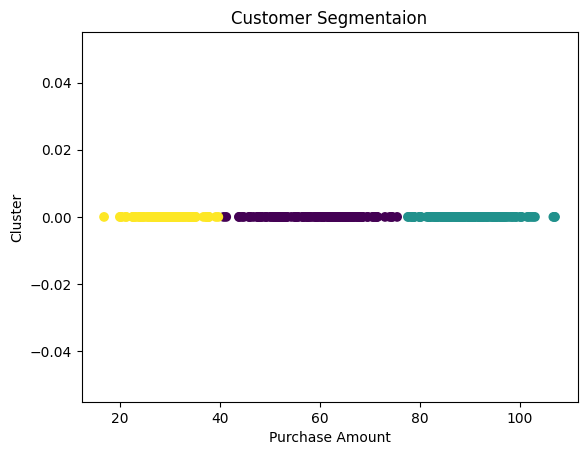

In [12]:
#visualize
plt.scatter(data,np.zeros_like(data),c=cluster_labels,cmap='viridis')
plt.xlabel('Purchase Amount')
plt.ylabel('Cluster')
plt.title('Customer Segmentaion')
plt.show()

In [13]:
#testing model
user_input=float(input("Enter a purchase amount to predict customer segement:"))
user_input_scaled = scaler.transform([[user_input]])
predicted_cluster = gmm.predict(user_input_scaled.reshape(-1,1))[0]
print(f"Predicted Customer Segment for a purchase amount of {user_input} is:{predicted_cluster +1}")

Enter a purchase amount to predict customer segement:50
Predicted Customer Segment for a purchase amount of 50.0 is:1
